In [ ]:
!pip install geopandas
!pip install folium
!pip install shapely
!pip install matplotlib

In [1]:
import geopandas as gpd
import pandas as pd
import folium
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt

In [2]:
# Sistemas de Coordenadas y Proyecciones
## Coordenadas Geográficas (Latitud/Longitud)

def crear_punto_geografico(lat, lon, nombre):
    """
    Crea un punto geográfico usando latitud y longitud
    """
    return gpd.GeoDataFrame(
        {'nombre': [nombre]},
        geometry=[Point(lon, lat)],
        crs="EPSG:4326"  # WGS 84
    )

In [3]:
# Ejemplo: Ciudad de México
cdmx = crear_punto_geografico(19.4326, -99.1332, "Ciudad de México")

In [4]:
# Visualización básica
def visualizar_punto(gdf):
    """
    Crea un mapa interactivo con el punto
    """
    m = folium.Map(
        location=[gdf.geometry.y[0], gdf.geometry.x[0]],
        zoom_start=12
    )

    for idx, row in gdf.iterrows():
        folium.Marker(
            [row.geometry.y, row.geometry.x],
            popup=row['nombre']
        ).add_to(m)

    return m

In [5]:
visualizar_punto(cdmx)

In [6]:
def crear_ejemplos_vectoriales():
    """
    Crea ejemplos de los tres tipos principales de datos vectoriales
    """
    # Punto
    punto = Point(-99.1332, 19.4326)

    # Línea (simulando una ruta)
    linea = LineString([
        (-99.1332, 19.4326),  # CDMX
        (-98.2063, 19.0413)   # Puebla
    ])

    # Polígono (simulando un área)
    poligono = Polygon([
        (-99.15, 19.45),
        (-99.10, 19.45),
        (-99.10, 19.40),
        (-99.15, 19.40),
        (-99.15, 19.45)
    ])

    # Crear GeoDataFrames
    gdf_punto = gpd.GeoDataFrame(
        {'tipo': ['Punto']},
        geometry=[punto],
        crs="EPSG:4326"
    )

    gdf_linea = gpd.GeoDataFrame(
        {'tipo': ['Línea']},
        geometry=[linea],
        crs="EPSG:4326"
    )

    gdf_poligono = gpd.GeoDataFrame(
        {'tipo': ['Polígono']},
        geometry=[poligono],
        crs="EPSG:4326"
    )

    return gdf_punto, gdf_linea, gdf_poligono

In [7]:
def visualizar_vectoriales(gdf_punto, gdf_linea, gdf_poligono):
    """
    Visualiza los tres tipos de datos vectoriales en un mapa
    """
    m = folium.Map(
        location=[19.4326, -99.1332],
        zoom_start=10
    )

    # Añadir punto
    folium.Marker(
        [gdf_punto.geometry.y[0], gdf_punto.geometry.x[0]],
        popup='Punto'
    ).add_to(m)

    # Añadir línea
    folium.PolyLine(
        locations=[[19.4326, -99.1332], [19.0413, -98.2063]],
        popup='Línea'
    ).add_to(m)

    # Añadir polígono
    folium.Polygon(
        locations=[
            [19.45, -99.15],
            [19.45, -99.10],
            [19.40, -99.10],
            [19.40, -99.15],
            [19.45, -99.15]
        ],
        popup='Polígono',
        color='red',
        fill=True
    ).add_to(m)

    return m

In [8]:
# 2. Crear ejemplos vectoriales
punto, linea, poligono = crear_ejemplos_vectoriales()
mapa_vectoriales = visualizar_vectoriales(punto, linea, poligono)

In [9]:
mapa_vectoriales

In [10]:
## 2.2 Proyecciones

def demostrar_proyecciones(gdf):
    """
    Demuestra el efecto de diferentes proyecciones
    """
    # Lista de proyecciones comunes
    proyecciones = {
        'WGS 84': 'EPSG:4326',
        'Mercator': 'EPSG:3857',
        'Lambert Conformal Conic': 'EPSG:3034'
    }

    # Crear una figura con subplots
    fig, axs = plt.subplots(1, len(proyecciones), figsize=(15, 5))

    for i, (nombre, codigo) in enumerate(proyecciones.items()):
        # Reproyectar los datos
        gdf_proyectado = gdf.to_crs(codigo)

        # Plotear
        gdf_proyectado.plot(ax=axs[i])
        axs[i].set_title(nombre)

    plt.tight_layout()
    return fig

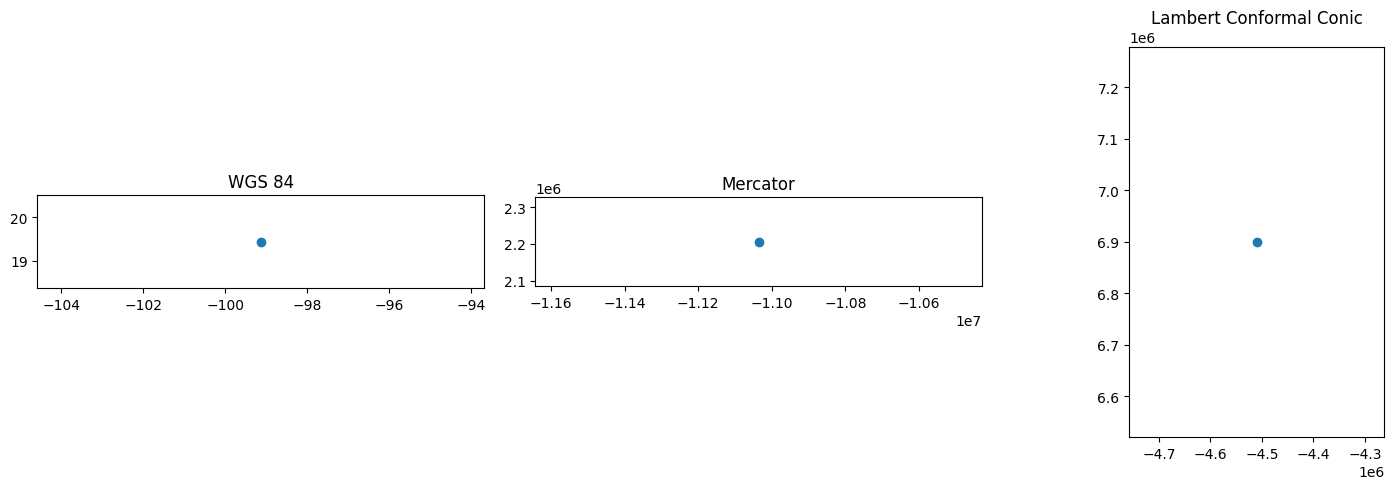

In [13]:
fig_proyecciones = demostrar_proyecciones(cdmx)

In [14]:
def ejercicio_coordenadas():
    """
    Ejercicio para practicar con coordenadas
    """
    # Crear algunos puntos de interés
    lugares = {
        'Ciudad de México': (19.4326, -99.1332),
        'Guadalajara': (20.6597, -103.3496),
        'Monterrey': (25.6866, -100.3161),
        'Cancún': (21.1619, -86.8515)
    }

    # Crear GeoDataFrame
    geometrias = [Point(lon, lat) for lat, lon in lugares.values()]
    gdf = gpd.GeoDataFrame(
        {'nombre': lugares.keys()},
        geometry=geometrias,
        crs="EPSG:4326"
    )

    return gdf

In [16]:
gdf_ejercicio = ejercicio_coordenadas()

In [18]:
gdf_ejercicio

,nombre,geometry
0,Ciudad de México,POINT (-99.1332 19.4326)
1,Guadalajara,POINT (-103.3496 20.6597)
2,Monterrey,POINT (-100.3161 25.6866)
3,Cancún,POINT (-86.8515 21.1619)


In [19]:
def ejercicio_distancias(gdf):
    """
    Calcula distancias entre puntos
    """
    # Matriz de distancias
    distancias = pd.DataFrame(
        index=gdf['nombre'],
        columns=gdf['nombre']
    )

    for idx1, row1 in gdf.iterrows():
        for idx2, row2 in gdf.iterrows():
            # Calcular distancia en kilómetros
            dist = row1.geometry.distance(row2.geometry) * 111
            distancias.at[row1['nombre'], row2['nombre']] = round(dist, 2)

    return distancias

In [21]:
matriz_distancias = ejercicio_distancias(gdf_ejercicio)

In [22]:
matriz_distancias

nombre,Ciudad de México,Guadalajara,Monterrey,Cancún
nombre,,,,
Ciudad de México,0.0,487.44,706.5,1376.72
Guadalajara,487.44,0.0,651.71,1832.14
Monterrey,706.5,651.71,0.0,1576.7
Cancún,1376.72,1832.14,1576.7,0.0


In [23]:
from geopy.geocoders import Nominatim
import folium

In [24]:
geocoder = Nominatim(user_agent="mi_aplicacion")

In [25]:
# Geocodificación básica (dirección → coordenadas)
def geocodificar(direccion):
    location = geocoder.geocode(direccion)
    if location:
        print(f"Coordenadas de '{direccion}':")
        print(f"  Latitud: {location.latitude}")
        print(f"  Longitud: {location.longitude}")
        return location.latitude, location.longitude
    else:
        print(f"No se encontró la dirección: {direccion}")
        return None

In [26]:
lugar = "Zócalo, Ciudad de México"
coordenadas = geocodificar(lugar)

Coordenadas de 'Zócalo, Ciudad de México':
  Latitud: 19.43271665
  Longitud: -99.13315966538465


In [28]:
# Geocodificación inversa (coordenadas → dirección)
def geocodificar_inversa(latitud, longitud):
    location = geocoder.reverse(f"{latitud}, {longitud}")
    if location:
        print(f"Dirección en ({latitud}, {longitud}):")
        print(f"  {location.address}")
        return location.address
    else:
        print(f"No se encontró dirección para estas coordenadas")
        return None

In [29]:
lat, lon = coordenadas
direccion = geocodificar_inversa(lat, lon)
direccion

Dirección en (19.43271665, -99.13315966538465):
  Plaza de la Constitución, Centro, Ciudad de México, Cuauhtémoc, Ciudad de México, 06060, México


'Plaza de la Constitución, Centro, Ciudad de México, Cuauhtémoc, Ciudad de México, 06060, México'

In [30]:
# Crear un mapa simple
m = folium.Map(location=[lat, lon], zoom_start=15)
folium.Marker([lat, lon], popup=lugar).add_to(m)
m.save('mapa_simple.html')
print("\nMapa guardado como 'mapa_simple.html'")


Mapa guardado como 'mapa_simple.html'


In [31]:
m